### Naive Bayes

- efficient, simple, probabilistic model
- suitable for high dimensional data
- naive assumption that features are independent
- good baseline learner
- easy to interpret

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [6]:
plt.style.use(['fivethirtyeight', 'seaborn-poster'])

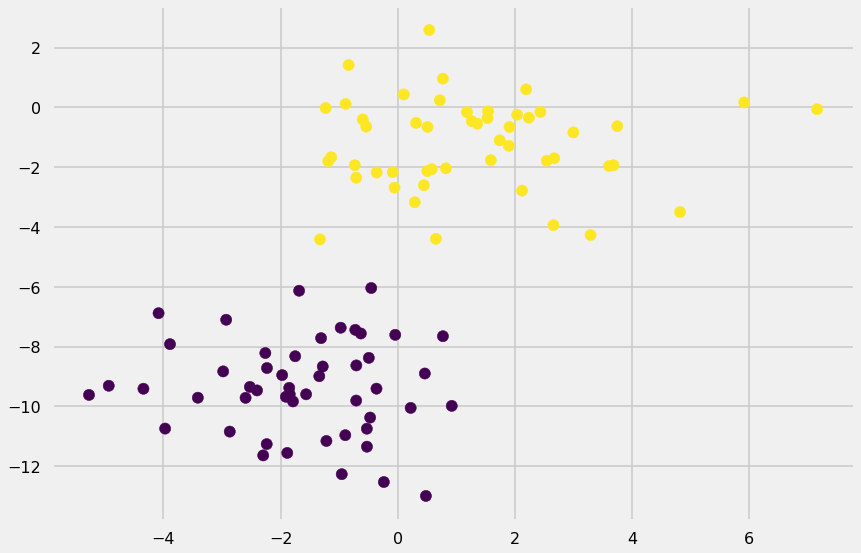

In [14]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y);

#### Gaussian Naive Bayes
- use with continuous features
- assumes data for each label is drawn from gaussian distribution with no covariance between dimensions
- fit by finding mean and std dev of each dimension

In [2]:
from sklearn.naive_bayes import GaussianNB

In [15]:
model = GaussianNB()
model.fit(X, y);

In [20]:
# new test set for visualization
rng = np.random.RandomState(42)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

(-5.898237164035184, 7.785249515582011, -13.787946408646567, 3.375456413166809)

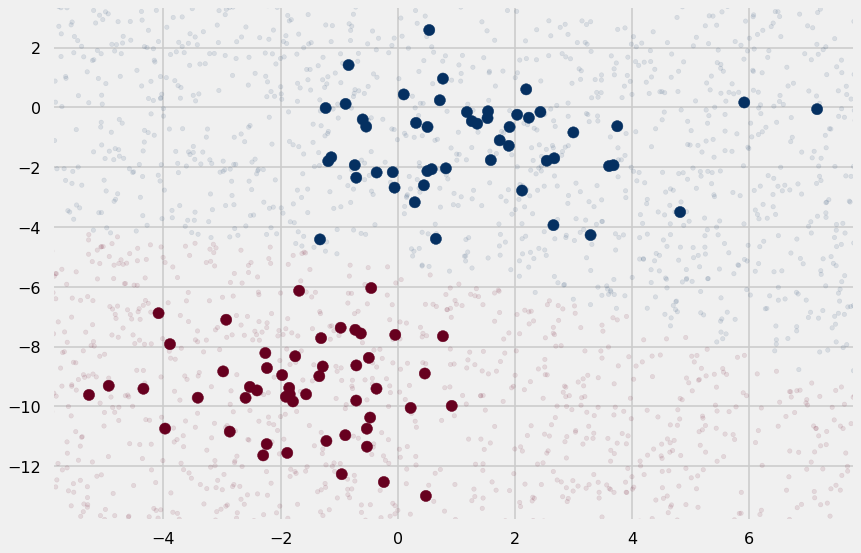

In [24]:
plt.scatter(X[:,0], X[:, 1], c=y, cmap='RdBu',)
lim = plt.axis()
plt.scatter(Xnew[:,0], Xnew[:,1], c=ynew, s=20, alpha=0.1, cmap='RdBu',)
plt.axis(lim)

In [25]:
# naturally allows for probabilistic classification
yprob = model.predict_proba(Xnew)
yprob[-8:].round(2)

array([[0.  , 1.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.83, 0.17],
       [1.  , 0.  ],
       [1.  , 0.  ]])

#### Multinomial Naive Bayes

- describes the probability of observing counts among a number of categories

In [26]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [27]:
categories = ['talk.religion.misc', 'soc.religion.christian',
              'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [28]:
print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [30]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

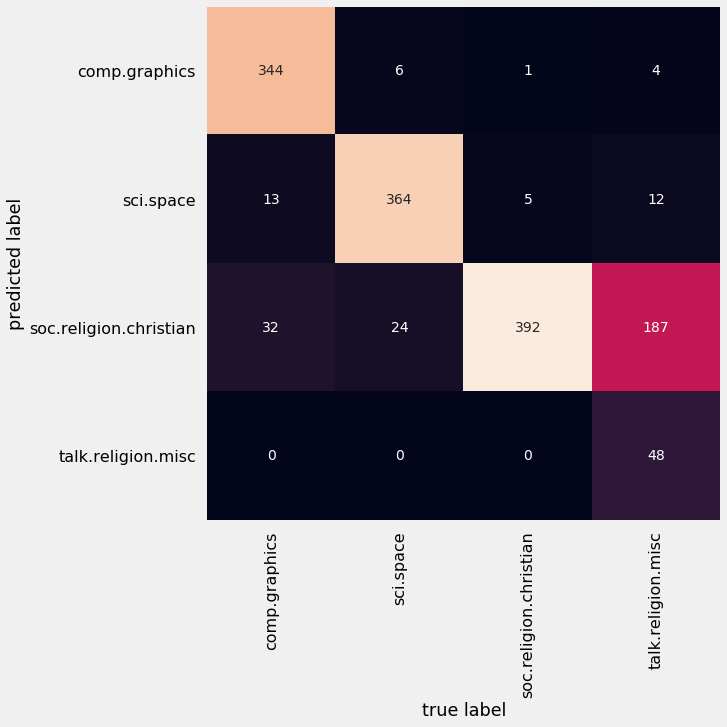

In [31]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [32]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [33]:
predict_category('sending a payload to the ISS')

'sci.space'

In [34]:
predict_category('discussing islam vs atheism')

'soc.religion.christian'

In [35]:
predict_category('determining the screen resolution')

'comp.graphics'